In [5]:
from floorplan_bis import getitem
from IP import reconstructFloorplan
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [10]:
path = '/Users/alex/Desktop/RTS/DCGAN/IP_masks/input/0004.txt'

In [11]:
corners, icons, rooms  = getitem(path)

In [12]:
rooms_mask = np.zeros(list(rooms.shape)+[10])
x,y = np.nonzero(rooms)

for idx in range(len(x)):
    if rooms[x[idx],y[idx]] <= 9:
        room_type = max(min(rooms[x[idx],y[idx]],8),1)
        rooms_mask[x[idx],y[idx],room_type] = 1.
    elif rooms[x[idx],y[idx]] == 11:
        rooms_mask[x[idx],y[idx],0] = 1.
bla = np.copy(rooms_mask[:,:,0])
rooms_mask[:,:,0] = 1- rooms_mask[:,:,0]-np.sum(rooms_mask[:,:,1:],2)

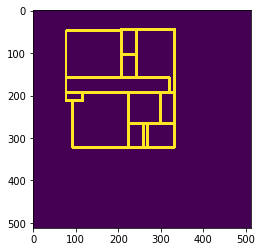

In [13]:
plt.imshow(bla)
plt.show()

In [14]:
def add_borders(mask,l):
    X,Y,Z  = np.nonzero(mask)
    mask = np.copy(mask)
    for x,y,z in zip(X,Y,Z):
        if z>0:
            for l1,l2 in zip(range(-l,l+1),range(-l,l+1)):
              mask[x+l1,y+l2,z] =1
    return mask

****************************************************************************************************
0


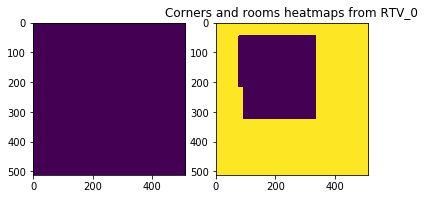

1


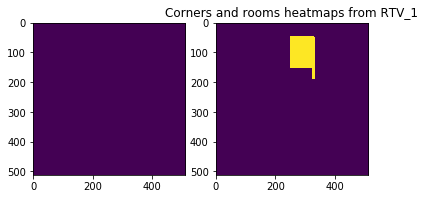

2


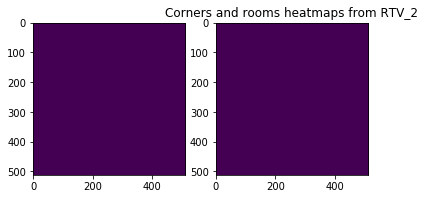

3


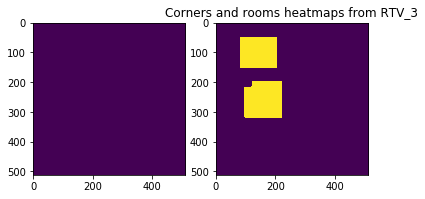

4


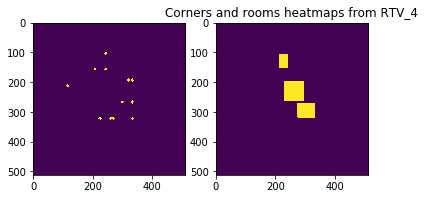

5


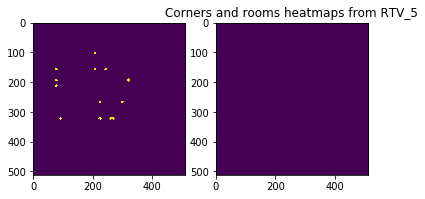

6


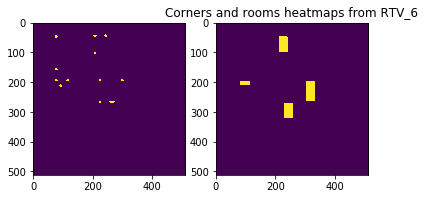

7


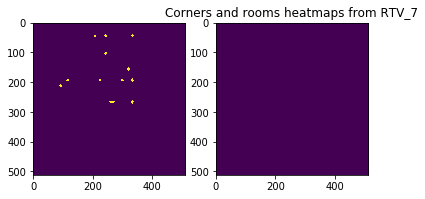

8


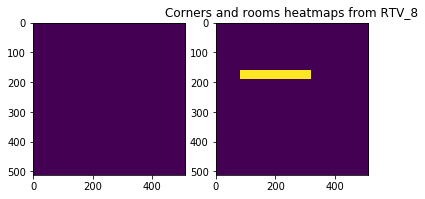

9


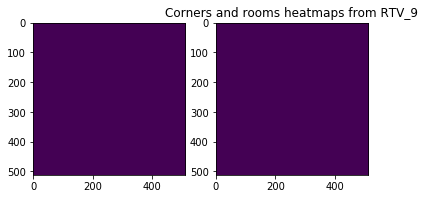

10


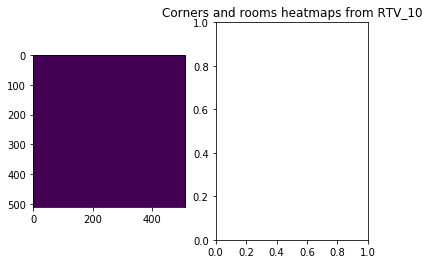

11


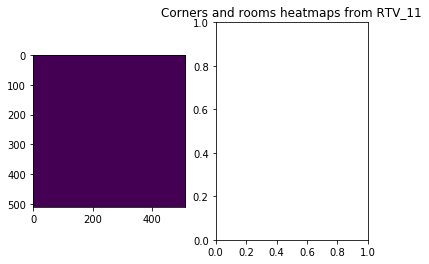

12


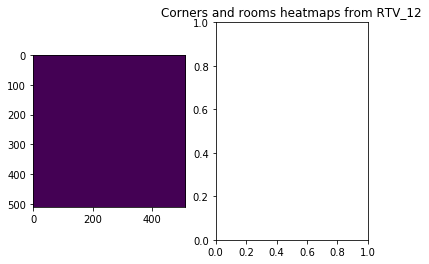

13


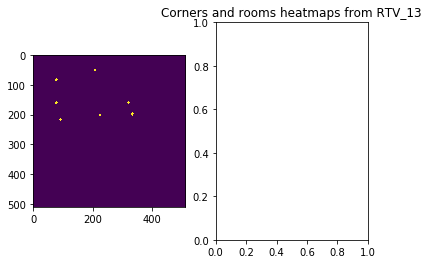

14


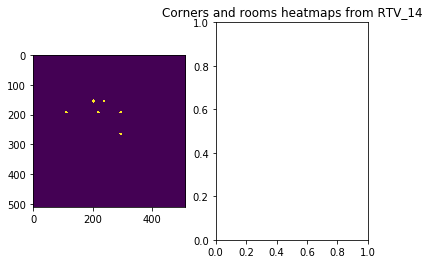

15


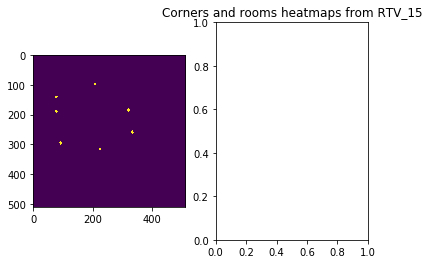

16


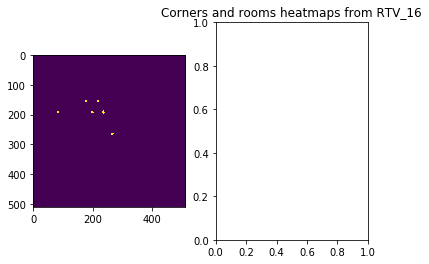

In [19]:
import matplotlib.pyplot as plt
_corners = corners[:,:,:17]
_rooms = add_borders(rooms_mask,1)
print(100*'*')
for i in range(17):
    print(i)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(_corners[:,:,i])
    plt.subplot(1,2,2)
    plt.title('Corners and rooms heatmaps from RTV_{}'.format(i))
    if i <10 :
       plt.imshow(_rooms[:,:,i])
    plt.show()